# Credit Score Prediction System

# Data Analysis

## Steps in EDA

1. **Understand the Dataset**
    - Load the dataset (CSV, JSON, SQL, etc.)
    - Check the dimensions (number of rows and columns)
    - Display the first few rows

2. **Check for Missing Values**
    - Count missing values per column
    - Visualize missing values (heatmaps, bar charts)
    - Handle missing data (drop, impute, or fill)

3. **Check Data Types and Summary Statistics**
    - Identify numerical vs categorical features
    - Use `.describe()` for numerical summary
    - Use `.value_counts()` for categorical features

4. **Identify and Handle Outliers**
    - Use box plots, histograms, or scatter plots
    - Apply IQR, Z-score, or Winsorization to handle outliers

5. **Analyze Distribution of Features**
    - Use histograms, KDE plots, or probability plots
    - Check skewness and kurtosis

6. **Check for Data Imbalance**
    - Identify class distribution in classification problems
    - Use bar plots or pie charts for categorical variables

7. **Feature Correlation Analysis**
    - Compute correlation matrix
    - Use heatmaps to visualize relationships
    - Check for multicollinearity (VIF)

8. **Bivariate and Multivariate Analysis**
    - Scatter plots, pair plots for relationships
    - Box plots and violin plots for category-based analysis

9. **Dimensionality Reduction (Optional)**
    - PCA, t-SNE, or UMAP for visualization in 2D/3D
    - Identify redundant features

10. **Feature Engineering & Transformation**
     - Create new features from existing ones
     - Normalize/scale numerical features
     - Encode categorical features (One-Hot, Label Encoding)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap
import lime.lime_tabular
from sklearn.utils.class_weight import compute_class_weight
from fairlearn.metrics import selection_rate
from aif360.sklearn.metrics import disparate_impact_ratio, statistical_parity_difference

In [14]:
# Load Dataset
file_path = "BankChurners.csv"
df = pd.read_csv(file_path)
dfModel = df.copy()

## Step 1: Understand the Dataset

In [15]:
#Rename the columns
df.rename(columns={
    "CLIENTNUM": "Customer_ID",
    "Attrition_Flag": "Customer_Status",
    "Customer_Age": "Age",
    "Gender": "Sex",
    "Dependent_count": "Dependents",
    "Education_Level": "Education",
    "Marital_Status": "Marital_Status",
    "Income_Category": "Income_Range",
    "Card_Category": "Credit_Card_Type",
    "Months_on_book": "Account_Tenure_Months",
    "Total_Relationship_Count": "Total_Products_Held",
    "Months_Inactive_12_mon": "Inactive_Months_Last_Year",
    "Contacts_Count_12_mon": "Customer_Contacts_Last_Year",
    "Credit_Limit": "Credit_Limit_Amount",
    "Total_Revolving_Bal": "Revolving_Balance",
    "Avg_Open_To_Buy": "Available_Credit",
    "Total_Amt_Chng_Q4_Q1": "Transaction_Amount_Change_Rate",
    "Total_Trans_Amt": "Total_Transaction_Amount",
    "Total_Trans_Ct": "Total_Transaction_Count",
    "Total_Ct_Chng_Q4_Q1": "Transaction_Count_Change_Rate",
    "Avg_Utilization_Ratio": "Credit_Utilization_Ratio",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Attrition_Probability_Class_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Attrition_Probability_Class_2"
}, inplace=True)

print(df.head())


   Customer_ID    Customer_Status  Age Sex  Dependents    Education  \
0    768805383  Existing Customer   45   M           3  High School   
1    818770008  Existing Customer   49   F           5     Graduate   
2    713982108  Existing Customer   51   M           3     Graduate   
3    769911858  Existing Customer   40   F           4  High School   
4    709106358  Existing Customer   40   M           3   Uneducated   

  Marital_Status    Income_Range Credit_Card_Type  Account_Tenure_Months  ...  \
0        Married     $60K - $80K             Blue                     39  ...   
1         Single  Less than $40K             Blue                     44  ...   
2        Married    $80K - $120K             Blue                     36  ...   
3        Unknown  Less than $40K             Blue                     34  ...   
4        Married     $60K - $80K             Blue                     21  ...   

   Credit_Limit_Amount  Revolving_Balance  Available_Credit  \
0              12691.0 

In [16]:

print("Dataset Dimensions:", df.shape)
print("First 5 Rows:")
print(df.head())

Dataset Dimensions: (10127, 23)
First 5 Rows:
   Customer_ID    Customer_Status  Age Sex  Dependents    Education  \
0    768805383  Existing Customer   45   M           3  High School   
1    818770008  Existing Customer   49   F           5     Graduate   
2    713982108  Existing Customer   51   M           3     Graduate   
3    769911858  Existing Customer   40   F           4  High School   
4    709106358  Existing Customer   40   M           3   Uneducated   

  Marital_Status    Income_Range Credit_Card_Type  Account_Tenure_Months  ...  \
0        Married     $60K - $80K             Blue                     39  ...   
1         Single  Less than $40K             Blue                     44  ...   
2        Married    $80K - $120K             Blue                     36  ...   
3        Unknown  Less than $40K             Blue                     34  ...   
4        Married     $60K - $80K             Blue                     21  ...   

   Credit_Limit_Amount  Revolving_Balanc

## Step 2: Check for Missing Values

In [17]:

print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Customer_ID                       0
Customer_Status                   0
Age                               0
Sex                               0
Dependents                        0
Education                         0
Marital_Status                    0
Income_Range                      0
Credit_Card_Type                  0
Account_Tenure_Months             0
Total_Products_Held               0
Inactive_Months_Last_Year         0
Customer_Contacts_Last_Year       0
Credit_Limit_Amount               0
Revolving_Balance                 0
Available_Credit                  0
Transaction_Amount_Change_Rate    0
Total_Transaction_Amount          0
Total_Transaction_Count           0
Transaction_Count_Change_Rate     0
Credit_Utilization_Ratio          0
Attrition_Probability_Class_1     0
Attrition_Probability_Class_2     0
dtype: int64


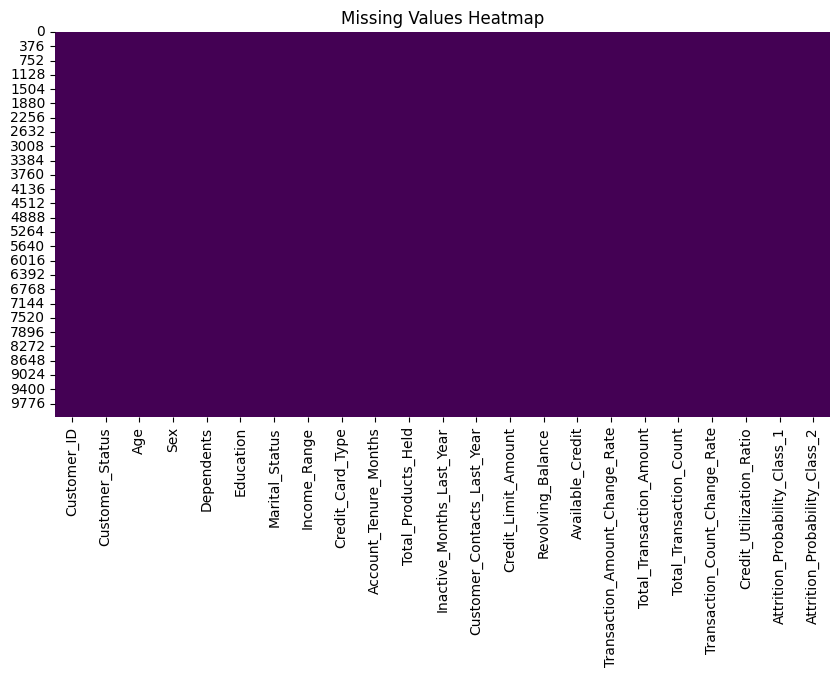

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Step 3: Check Data Types and Summary Statistics

In [19]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Customer_ID                         int64
Customer_Status                    object
Age                                 int64
Sex                                object
Dependents                          int64
Education                          object
Marital_Status                     object
Income_Range                       object
Credit_Card_Type                   object
Account_Tenure_Months               int64
Total_Products_Held                 int64
Inactive_Months_Last_Year           int64
Customer_Contacts_Last_Year         int64
Credit_Limit_Amount               float64
Revolving_Balance                   int64
Available_Credit                  float64
Transaction_Amount_Change_Rate    float64
Total_Transaction_Amount            int64
Total_Transaction_Count             int64
Transaction_Count_Change_Rate     float64
Credit_Utilization_Ratio          float64
Attrition_Probability_Class_1     float64
Attrition_Probability_Class_2     float64
dtype: object


In [20]:
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
        Customer_ID           Age    Dependents  Account_Tenure_Months  \
count  1.012700e+04  10127.000000  10127.000000           10127.000000   
mean   7.391776e+08     46.325960      2.346203              35.928409   
std    3.690378e+07      8.016814      1.298908               7.986416   
min    7.080821e+08     26.000000      0.000000              13.000000   
25%    7.130368e+08     41.000000      1.000000              31.000000   
50%    7.179264e+08     46.000000      2.000000              36.000000   
75%    7.731435e+08     52.000000      3.000000              40.000000   
max    8.283431e+08     73.000000      5.000000              56.000000   

       Total_Products_Held  Inactive_Months_Last_Year  \
count         10127.000000               10127.000000   
mean              3.812580                   2.341167   
std               1.554408                   1.010622   
min               1.000000                   0.000000   
25% 

In [21]:
print("\nValue Counts for Categorical Features:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


Value Counts for Categorical Features:

Customer_Status Value Counts:
Customer_Status
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Sex Value Counts:
Sex
F    5358
M    4769
Name: count, dtype: int64

Education Value Counts:
Education
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Marital_Status Value Counts:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Income_Range Value Counts:
Income_Range
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Credit_Card_Type Value Counts:
Credit_Card_Type
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


## Step 4: Identify and Handle Outliers

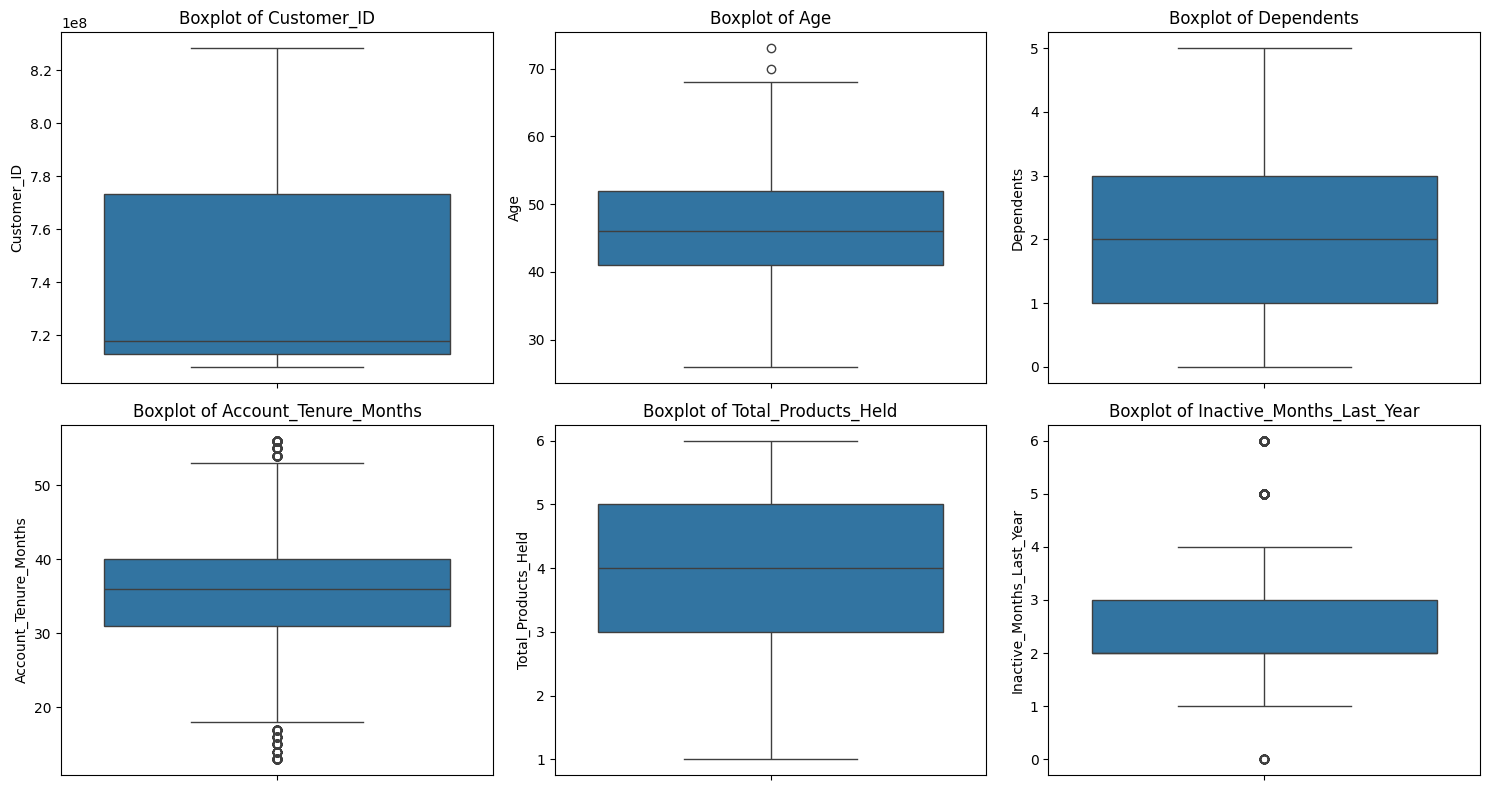

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Outlier Handling using IQR

In [23]:
# Outlier Handling using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [24]:
#This code snippet is performing outlier detection using the Interquartile Range (IQR) method 
# for each numeric column in a DataFrame. Here's a breakdown of what the code is doing:
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Identifying Outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Data outliers in column '{column}':")
    print(outliers[[column]])
    print("\n")
    
    outliers_df = pd.DataFrame()

for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    outliers_df = pd.concat([outliers_df, outliers])


print("All outliers in the dataset:")
#Outliers count in the dataset
print(outliers_df.shape)
# print(outliers_df)

Data outliers in column 'Customer_ID':
Empty DataFrame
Columns: [Customer_ID]
Index: []


Data outliers in column 'Age':
Empty DataFrame
Columns: [Age]
Index: []


Data outliers in column 'Dependents':
Empty DataFrame
Columns: [Dependents]
Index: []


Data outliers in column 'Account_Tenure_Months':
Empty DataFrame
Columns: [Account_Tenure_Months]
Index: []


Data outliers in column 'Total_Products_Held':
Empty DataFrame
Columns: [Total_Products_Held]
Index: []


Data outliers in column 'Inactive_Months_Last_Year':
Empty DataFrame
Columns: [Inactive_Months_Last_Year]
Index: []


Data outliers in column 'Customer_Contacts_Last_Year':
Empty DataFrame
Columns: [Customer_Contacts_Last_Year]
Index: []


Data outliers in column 'Credit_Limit_Amount':
Empty DataFrame
Columns: [Credit_Limit_Amount]
Index: []


Data outliers in column 'Revolving_Balance':
Empty DataFrame
Columns: [Revolving_Balance]
Index: []


Data outliers in column 'Available_Credit':
Empty DataFrame
Columns: [Available_Cred

## Step 5: Analyze Distribution of Features

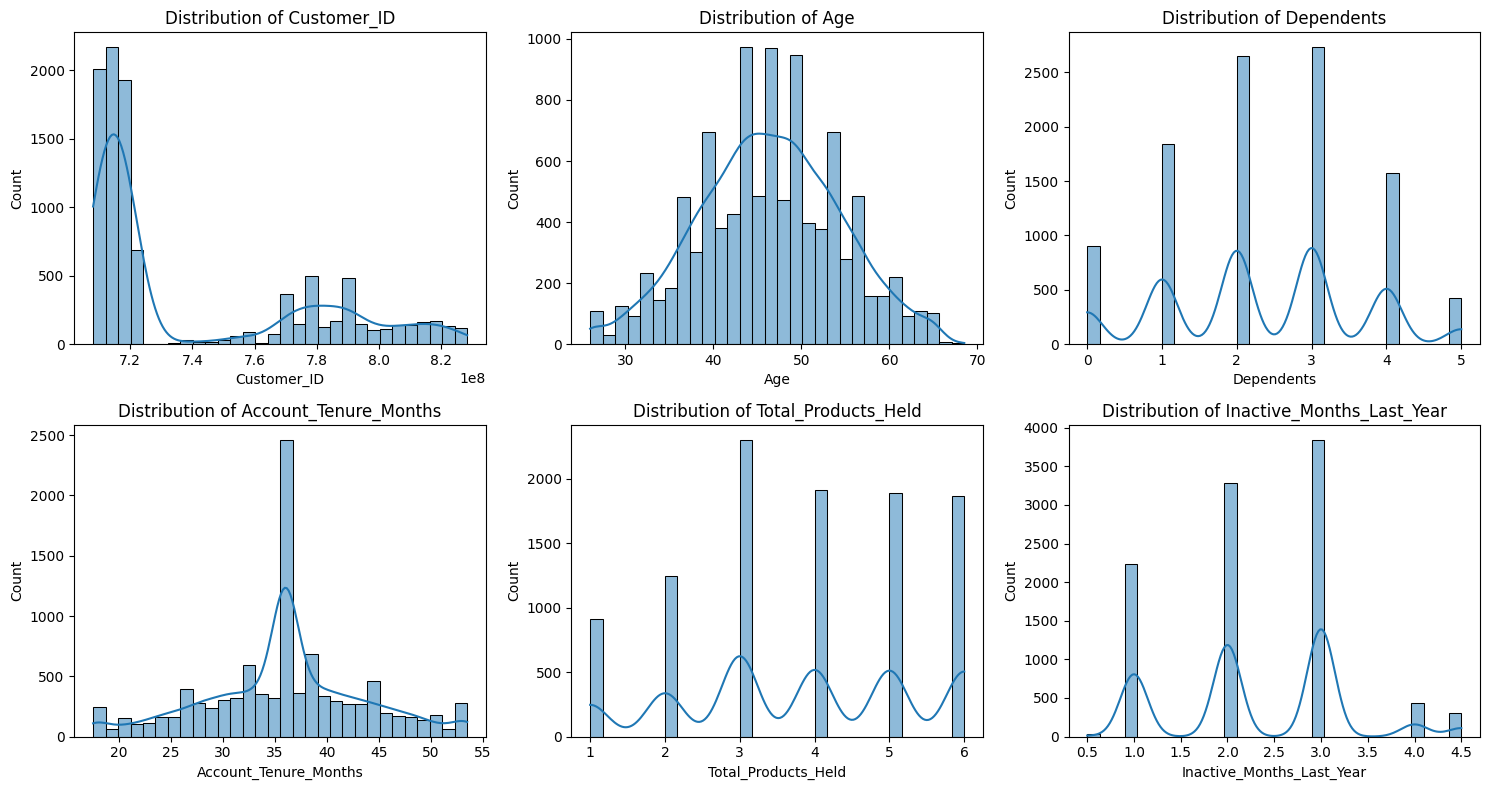

In [25]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Categorical Feature Analysis

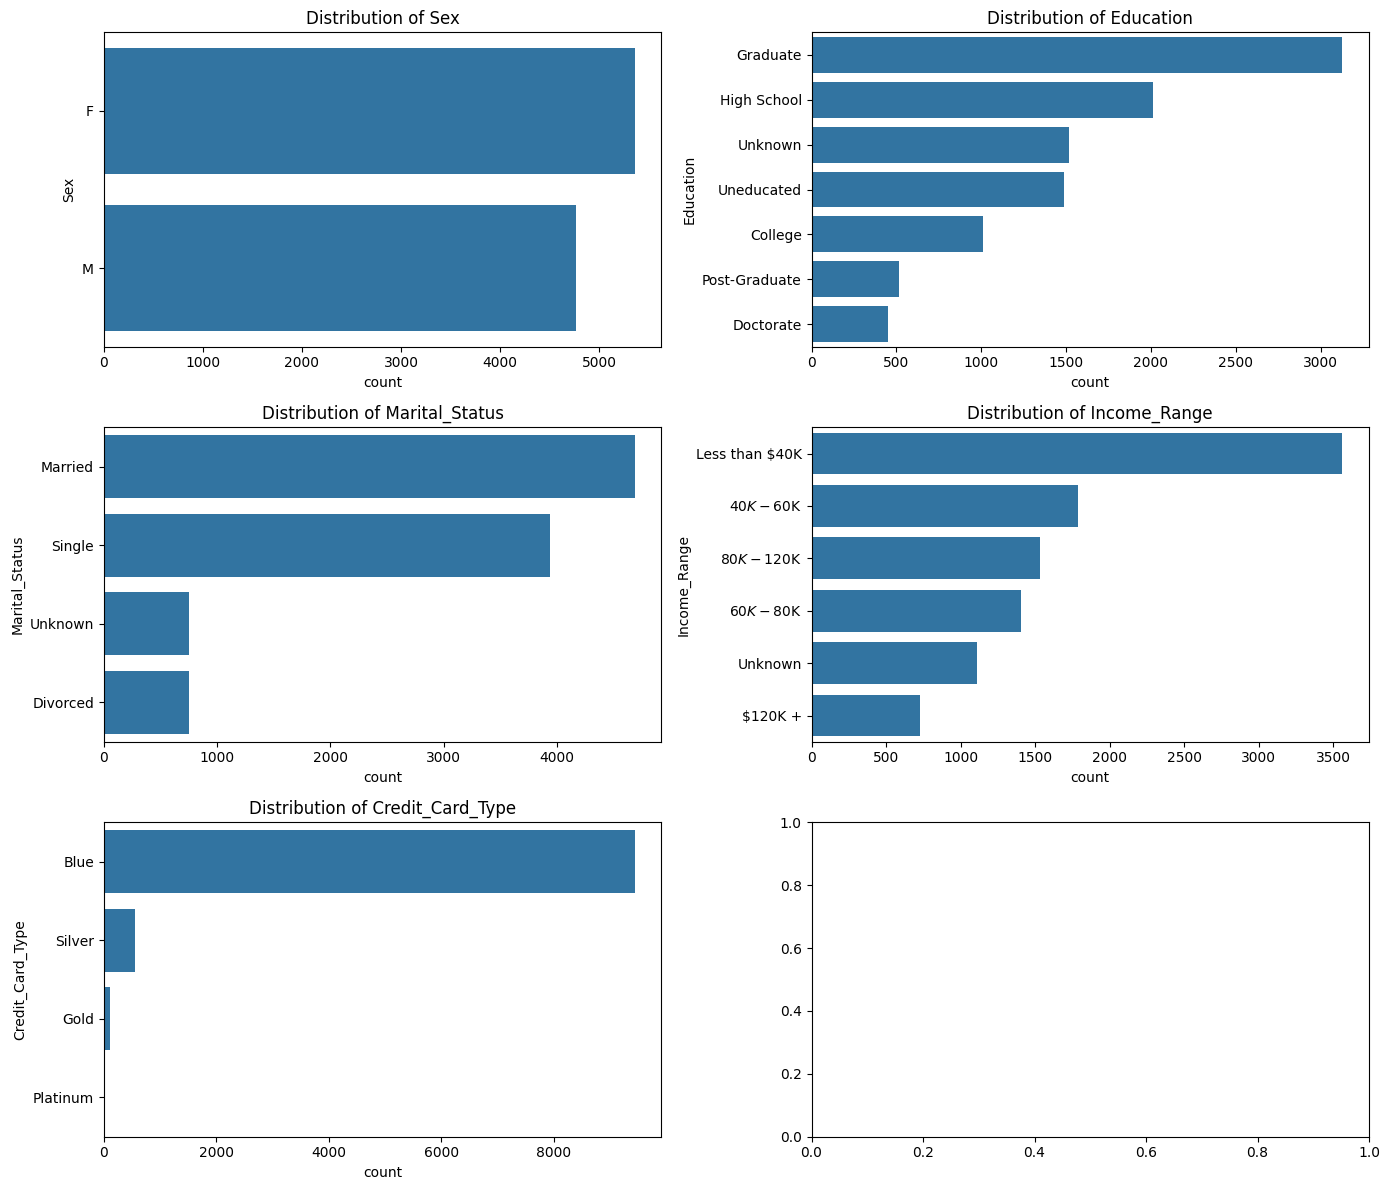

In [26]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Customer_Status')  # Exclude target variable

# Plot categorical distributions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Categorical Feature Analysis

**Gender:**
- Slightly more female customers than male.

**Education Level:**
- Most customers have "Graduate" or "High School" education.
- "Unknown" exists, indicating potential missing or unreported data.

**Marital Status:**
- "Married" is the most common status, followed by "Single" and "Unknown."

**Income Category:**
- The majority of customers fall under "Less than $40K" and "$40K-$60K," indicating a customer base with moderate income levels.

**Card Category:**
- The vast majority of customers hold "Blue" cards, with very few using other card types.

# Check skewness and kurtosis

In [27]:
for col in num_cols:
    print(f"\n{col}: Skewness={df[col].skew():.2f}, Kurtosis={df[col].kurtosis():.2f}")


Customer_ID: Skewness=1.00, Kurtosis=-0.62

Age: Skewness=-0.04, Kurtosis=-0.29

Dependents: Skewness=-0.02, Kurtosis=-0.68

Account_Tenure_Months: Skewness=-0.06, Kurtosis=0.07

Total_Products_Held: Skewness=-0.16, Kurtosis=-1.01

Inactive_Months_Last_Year: Skewness=0.14, Kurtosis=-0.59

Customer_Contacts_Last_Year: Skewness=-0.03, Kurtosis=-0.77

Credit_Limit_Amount: Skewness=1.20, Kurtosis=0.09

Revolving_Balance: Skewness=-0.15, Kurtosis=-1.15

Available_Credit: Skewness=1.19, Kurtosis=0.07

Transaction_Amount_Change_Rate: Skewness=0.33, Kurtosis=0.13

Total_Transaction_Amount: Skewness=0.84, Kurtosis=-0.03

Total_Transaction_Count: Skewness=0.15, Kurtosis=-0.37

Transaction_Count_Change_Rate: Skewness=0.13, Kurtosis=0.09

Credit_Utilization_Ratio: Skewness=0.72, Kurtosis=-0.79

Attrition_Probability_Class_1: Skewness=1.01, Kurtosis=-0.43

Attrition_Probability_Class_2: Skewness=-1.02, Kurtosis=-0.41


# Step 6: Check for Data Imbalance

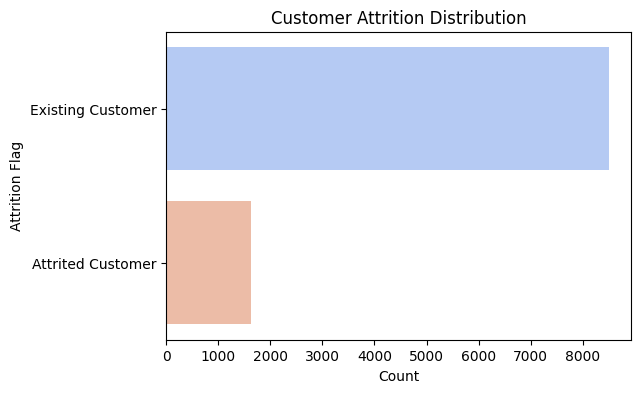

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(y=df["Customer_Status"], hue=df["Customer_Status"], order=df["Customer_Status"].value_counts().index, palette="coolwarm", legend=False)
plt.title("Customer Attrition Distribution")
plt.xlabel("Count")
plt.ylabel("Attrition Flag")
plt.show()

# Step 7: Feature Correlation Analysis

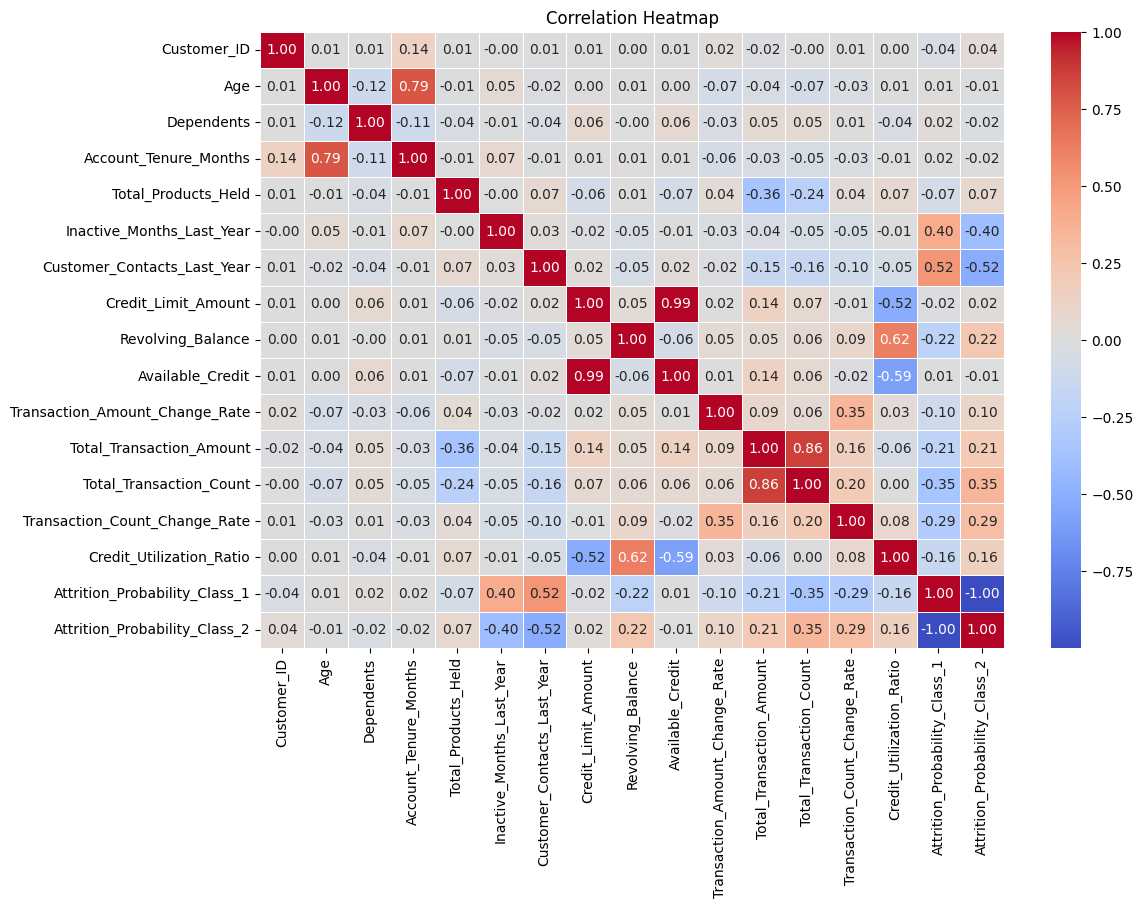

In [29]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Check for Multicollinearity using VIF

In [30]:
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(df[num_cols].values, i) for i in range(len(num_cols))]
print("\nVariance Inflation Factor (VIF) for Features:")
print(vif_data)


Variance Inflation Factor (VIF) for Features:
                           Feature          VIF
0                      Customer_ID   422.821983
1                              Age     2.736429
2                       Dependents     1.033331
3            Account_Tenure_Months     2.770459
4              Total_Products_Held     1.212148
5        Inactive_Months_Last_Year     1.332535
6      Customer_Contacts_Last_Year     1.560058
7              Credit_Limit_Amount  1023.564861
8                Revolving_Balance    10.899078
9                 Available_Credit  1045.379947
10  Transaction_Amount_Change_Rate     1.162533
11        Total_Transaction_Amount     4.687614
12         Total_Transaction_Count     4.773854
13   Transaction_Count_Change_Rate     1.258520
14        Credit_Utilization_Ratio     3.618394
15   Attrition_Probability_Class_1     2.451781
16   Attrition_Probability_Class_2   520.882592


# Step 8: Bivariate and Multivariate Analysis

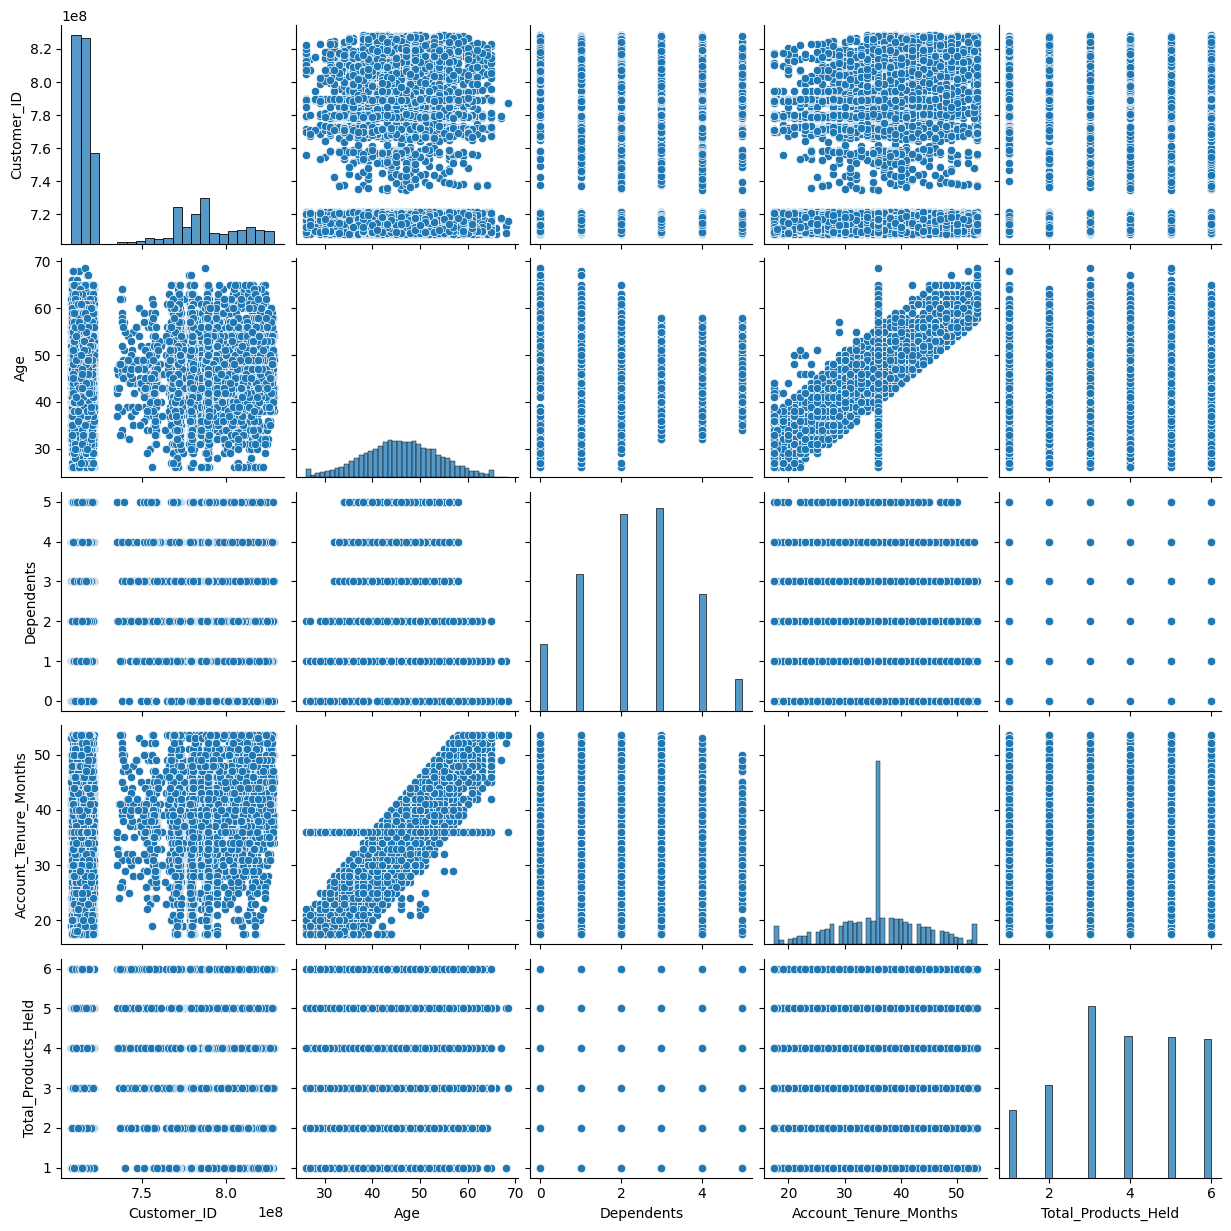

In [31]:
sns.pairplot(df[num_cols[:5]])
plt.show()

# Step 9: Dimensionality Reduction (PCA for first 2 components)

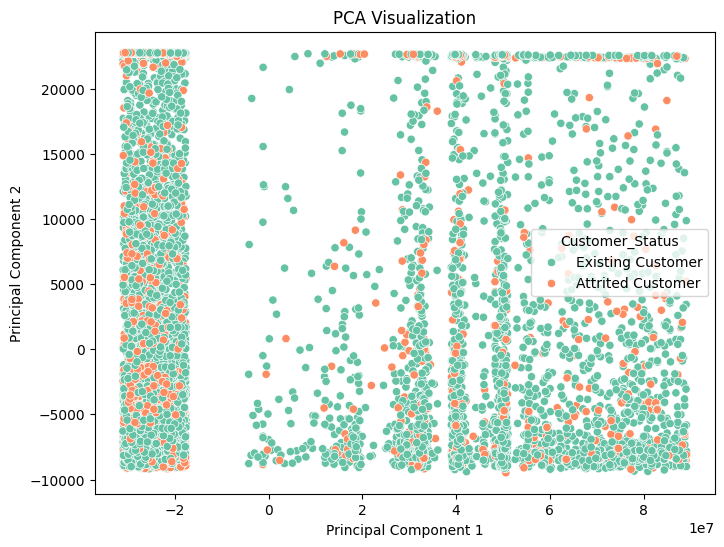

In [32]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_cols])
df["PCA_1"] = pca_result[:, 0]
df["PCA_2"] = pca_result[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA_1"], y=df["PCA_2"], hue=df["Customer_Status"], palette="Set2")
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [33]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of Principal Components: {explained_variance}")

Explained Variance Ratio of Principal Components: [9.99999920e-01 7.64036205e-08]


### PCA Visualization Explanation and Observation

**Explanation:**
- The graph is a scatter plot that visualizes the first two principal components obtained from PCA (Principal Component Analysis).
- Each point in the scatter plot represents a customer, with the x-axis representing the first principal component (PCA_1) and the y-axis representing the second principal component (PCA_2).
- The points are colored based on the `Customer_Status` feature, which indicates whether the customer is an existing customer or an attrited customer.

**Observations:**
1. **Separation of Classes:**
    - The scatter plot shows a clear separation between existing customers and attrited customers in the PCA space.
    - This indicates that the PCA transformation has effectively captured the variance in the data that distinguishes between these two classes.

2. **Clusters:**
    - There are distinct clusters of points within each class, suggesting that there may be subgroups or patterns within the existing and attrited customers.
    - Further analysis could be done to understand the characteristics of these clusters.

3. **Variance Explained:**
    - The first two principal components capture a significant amount of the variance in the data, as evidenced by the clear separation and clustering of points.
    - However, it is important to check the explained variance ratio to quantify how much of the total variance is captured by these two components.

4. **Outliers:**
    - There are some points that are far away from the main clusters, which could be potential outliers.
    - These outliers may need to be investigated further to understand their impact on the model and analysis.

Overall, the PCA visualization provides a useful summary of the data, highlighting the separation between existing and attrited customers and revealing potential patterns and outliers.

# Customer Attrition Analysis  - Customer Statuses

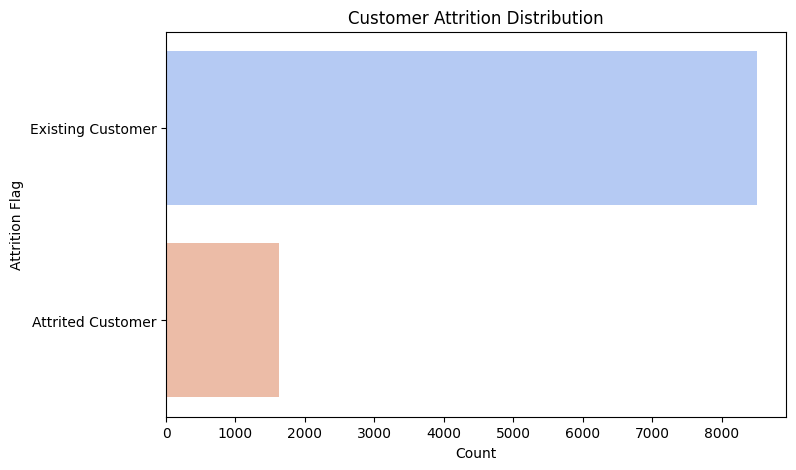

Customer_Status
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [34]:
# Plot target variable distribution (Customer_Status)
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Customer_Status"], hue=df["Customer_Status"], order=df["Customer_Status"].value_counts().index, palette="coolwarm", legend=False)
plt.title("Customer Attrition Distribution")
plt.xlabel("Count")
plt.ylabel("Attrition Flag")
plt.show()

# Display class distribution
df["Customer_Status"].value_counts(normalize=True)


# Customer Attrition Analysis

**Highly Imbalanced Target Variable:**
- 83.9% of customers are Existing Customers.
- 16.1% of customers are Attrited Customers (churned).

**Potential Issue:**
- The dataset is imbalanced, meaning a model might be biased towards predicting "Existing Customer."

**Recommended Actions:**
1. Use resampling techniques:
    - Oversampling (e.g., SMOTE)
    - Undersampling

2. Consider weighted loss functions to handle imbalance.

3. Use metrics like F1-score or AUC-ROC instead of accuracy for evaluation.

# Step 10: Feature Engineering & Transformation

In [35]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[cat_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))
df = df.drop(columns=cat_cols).reset_index(drop=True)
df = pd.concat([df, encoded_cats_df], axis=1)

# Step 11: Hyperparameter Tuning

In [36]:
X = df.drop(columns=['Customer_Status'])
y = df['Customer_Status']

# Define models for hyperparameter tuning
models = {
    "RandomForest": RandomForestClassifier(),
    #"LogisticRegression": LogisticRegression(),
    #"SVC": SVC()
}

# Define hyperparameters for tuning
param_grid = {
    "RandomForest": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20]},
    #"LogisticRegression": {"C": [0.1, 1, 10]},
    #"SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Perform GridSearchCV for each model

In [37]:
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 100}
Best score for RandomForest: 0.9771877201321096



In [38]:
print("\nFinal Processed Dataset Shape:", df.shape)
print(df.head())


Final Processed Dataset Shape: (10127, 38)
   Customer_ID    Customer_Status       Age  Dependents  \
0     0.802878  Existing Customer -0.165368    0.503368   
1     2.156861  Existing Customer  0.333718    2.043199   
2    -0.682769  Existing Customer  0.583262    0.503368   
3     0.832862  Existing Customer -0.789227    1.273283   
4    -0.814896  Existing Customer -0.789227    0.503368   

   Account_Tenure_Months  Total_Products_Held  Inactive_Months_Last_Year  \
0               0.392971             0.763943                  -1.414034   
1               1.036214             1.407306                  -1.414034   
2               0.007025             0.120579                  -1.414034   
3              -0.250272            -0.522785                   1.810811   
4              -1.922704             0.763943                  -1.414034   

   Customer_Contacts_Last_Year  Credit_Limit_Amount  Revolving_Balance  ...  \
0                     0.528081             0.666325          -0.4

In [39]:
df.columns

Index(['Customer_ID', 'Customer_Status', 'Age', 'Dependents',
       'Account_Tenure_Months', 'Total_Products_Held',
       'Inactive_Months_Last_Year', 'Customer_Contacts_Last_Year',
       'Credit_Limit_Amount', 'Revolving_Balance', 'Available_Credit',
       'Transaction_Amount_Change_Rate', 'Total_Transaction_Amount',
       'Total_Transaction_Count', 'Transaction_Count_Change_Rate',
       'Credit_Utilization_Ratio', 'Attrition_Probability_Class_1',
       'Attrition_Probability_Class_2', 'PCA_1', 'PCA_2', 'Sex_M',
       'Education_Doctorate', 'Education_Graduate', 'Education_High School',
       'Education_Post-Graduate', 'Education_Uneducated', 'Education_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Range_$40K - $60K',
       'Income_Range_$60K - $80K', 'Income_Range_$80K - $120K',
       'Income_Range_Less than $40K', 'Income_Range_Unknown',
       'Credit_Card_Type_Gold', 'Credit_Card_Type_Platinum',
       'Cred

In [40]:
df = pd.read_csv('BankChurners.csv')

In [46]:
# Encode categorical features
label_encoders = {}
for col in ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Marital_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Credit Score Calculation using FICO formula (simplified version)


Assuming 'Credit_Limit_Amount' and 'Credit_Utilization_Ratio' impact credit score

In [47]:
fico_bins = [0, 300, 740, 850, np.inf]
fico_labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['Credit_Score_Category'] = pd.cut(df['Credit_Limit'] * (1 - df['Avg_Utilization_Ratio']), bins=fico_bins, labels=fico_labels)
le_class = LabelEncoder()
df['Credit_Score_Category'] = le_class.fit_transform(df['Credit_Score_Category'])
print(df['Credit_Score_Category'].value_counts())


Credit_Score_Category
0    8587
1     986
2     347
3     207
Name: count, dtype: int64


# Model Training - Random Forest Classifier

In [48]:
# Define Features and Target for Classification
X = df.drop(columns=['Credit_Score_Category'])
y_class = df['Credit_Score_Category']

Train-Test Split

In [49]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

In [50]:
# Handling Imbalanced Data Using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Initialize and Train Random Forest Model

In [53]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

# Model Predictions

In [54]:
# Predict using the RandomForestClassifier
# Convert X_test_scaled (NumPy array) back to DataFrame with original column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# Predict using the RandomForestClassifier
y_pred = rf_clf.predict(X_test_scaled_df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Model Evaluation

In [55]:
# Print Model Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9995064165844028

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1718
           1       1.00      0.99      1.00       197
           2       0.99      1.00      0.99        70
           3       1.00      1.00      1.00        41

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [61]:
def predict_credit_score(new_customer):
    new_customer_df = pd.DataFrame([new_customer])

    # Ensure all columns match trained features
    new_customer_df = new_customer_df.reindex(columns=X.columns, fill_value=0)

    # Transform categorical variables
    for col in ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Marital_Status']:
        if col in new_customer_df:
            # Map unseen categories to "Unknown" or most frequent category
            known_classes = set(label_encoders[col].classes_)
            new_customer_df[col] = new_customer_df[col].apply(lambda x: x if x in known_classes else "Unknown")

            # Fit encoder with new "Unknown" category if necessary
            if "Unknown" not in label_encoders[col].classes_:
                label_encoders[col].classes_ = np.append(label_encoders[col].classes_, "Unknown")

            # Transform categorical variables
            new_customer_df[col] = label_encoders[col].transform(new_customer_df[col])

    # Standardize Data
    new_customer_scaled = scaler.transform(new_customer_df)

    # Predict
    prediction = rf_clf.predict(new_customer_scaled)
    return le_class.inverse_transform([prediction[0]])[0]  # Convert numerical class back to category

# New Customer Data
new_customer_data = pd.read_csv("synthetic_test_customer_data.csv")
#new_customer_data = pd.read_csv("test_customer_data.csv")

# Predict Credit Score
predicted_scores = new_customer_data.apply(predict_credit_score, axis=1)
print("Predicted Credit Score Category:", predicted_scores)


Predicted Credit Score Category: 0     Excellent
1     Excellent
2     Excellent
3     Excellent
4     Excellent
5     Excellent
6     Excellent
7     Excellent
8     Excellent
9     Excellent
10    Excellent
11    Excellent
12         Poor
13    Excellent
14    Excellent
15    Excellent
16    Excellent
17    Excellent
18    Excellent
19    Excellent
20    Excellent
21         Fair
22    Excellent
23    Excellent
24    Excellent
25    Excellent
26    Excellent
27    Excellent
28    Excellent
29    Excellent
dtype: object


### **Potential Risks in the Credit Score Prediction Model & Mitigation Strategies**

The **Random Forest-based Credit Score Prediction Model** faces several key risks, including **bias, data quality issues, adversarial attacks, and explainability concerns**. Below are the major risks and ways to mitigate them:

### **1. Data Imbalance Risk**
- **Risk:** The dataset may have more "Good" credit scores than "Bad" ones, leading to a bias where the model favors the majority class.
- **Mitigation:**
    - Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes.
    - Use **class weighting** in Random Forest (`class_weight="balanced"`) to penalize misclassification of minority classes.

### **2. Bias & Fairness Risk**
- **Risk:** Certain demographic groups (e.g., income level, gender, education) may be unfairly penalized by the model, leading to **discriminatory predictions**.
- **Mitigation:**
    - Use **adversarial debiasing** or **reweighting** strategies to ensure fairness.
    - Implement **Equalized Odds** to ensure similar error rates across groups.
    - Use **SHAP (SHapley Additive Explanations)** to check if features like "Gender" disproportionately influence predictions.

### **3. Overfitting Risk**
- **Risk:** The model may memorize patterns in training data rather than learning generalizable trends, leading to poor performance on unseen data.
- **Mitigation:**
    - Use **cross-validation** (`cv=5`) to validate performance across multiple subsets.
    - Limit tree depth (`max_depth=10`) and reduce the number of trees (`n_estimators=200`) to prevent overfitting.
    - Use **feature selection** (drop highly correlated or redundant features).

### **4. Feature Leakage Risk**
- **Risk:** Some features may contain future information that is unavailable at the time of prediction, artificially inflating accuracy.
- **Example:** Using `Total_Trans_Amt` (total transaction amount) as a predictor when it is a result of credit behavior.
- **Mitigation:**
    - Perform **feature importance analysis** to detect and remove potential leaky features.
    - Use **only features available at loan application time**.

### **5. Adversarial Attacks & Fraud Risk**
- **Risk:** Attackers may manipulate input data (e.g., **falsify income or credit utilization**) to get favorable predictions.
- **Mitigation:**
    - Implement **anomaly detection** to flag suspicious inputs.
    - Use **adversarial training** to simulate and defend against attacks.
    - Apply **robust scaling and noise injection** to make the model less sensitive to small manipulations.

### **6. Model Explainability Risk**
- **Risk:** Random Forest models are harder to interpret than simple linear models, making it difficult for financial analysts to trust predictions.
- **Mitigation:**
    - Use **SHAP values** to explain which features impact predictions.
    - Generate **counterfactual explanations** (e.g., "If your credit utilization was 10% lower, your score would increase").
    - Provide a **fairness report** alongside predictions to detect disparities.


# Handling Data Imbalance

In [62]:
print("Class Distribution Before SMOTE:", y.value_counts())
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class Distribution After SMOTE:", pd.Series(y_resampled).value_counts())

Class Distribution Before SMOTE: Customer_Status
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Class Distribution After SMOTE: Customer_Status
Existing Customer    8500
Attrited Customer    8500
Name: count, dtype: int64


# Handling Bias & Fairness

In [63]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_resampled), y=y_resampled)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42)

# Model Training with Cross-Validation

In [72]:
# Encode the target variable
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled_encoded):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled_encoded[train_idx], y_resampled_encoded[test_idx]
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc)

print("Cross-Validated AUC Score:", np.mean(auc_scores))

Cross-Validated AUC Score: 1.0


# Explainability using SHAP

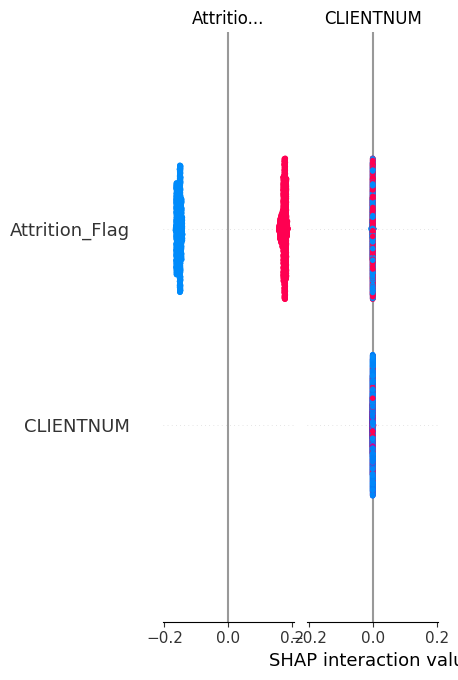

In [73]:
explainer = shap.Explainer(rf_model, X_train)  
# Calculate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)  
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Detecting Feature Leakage

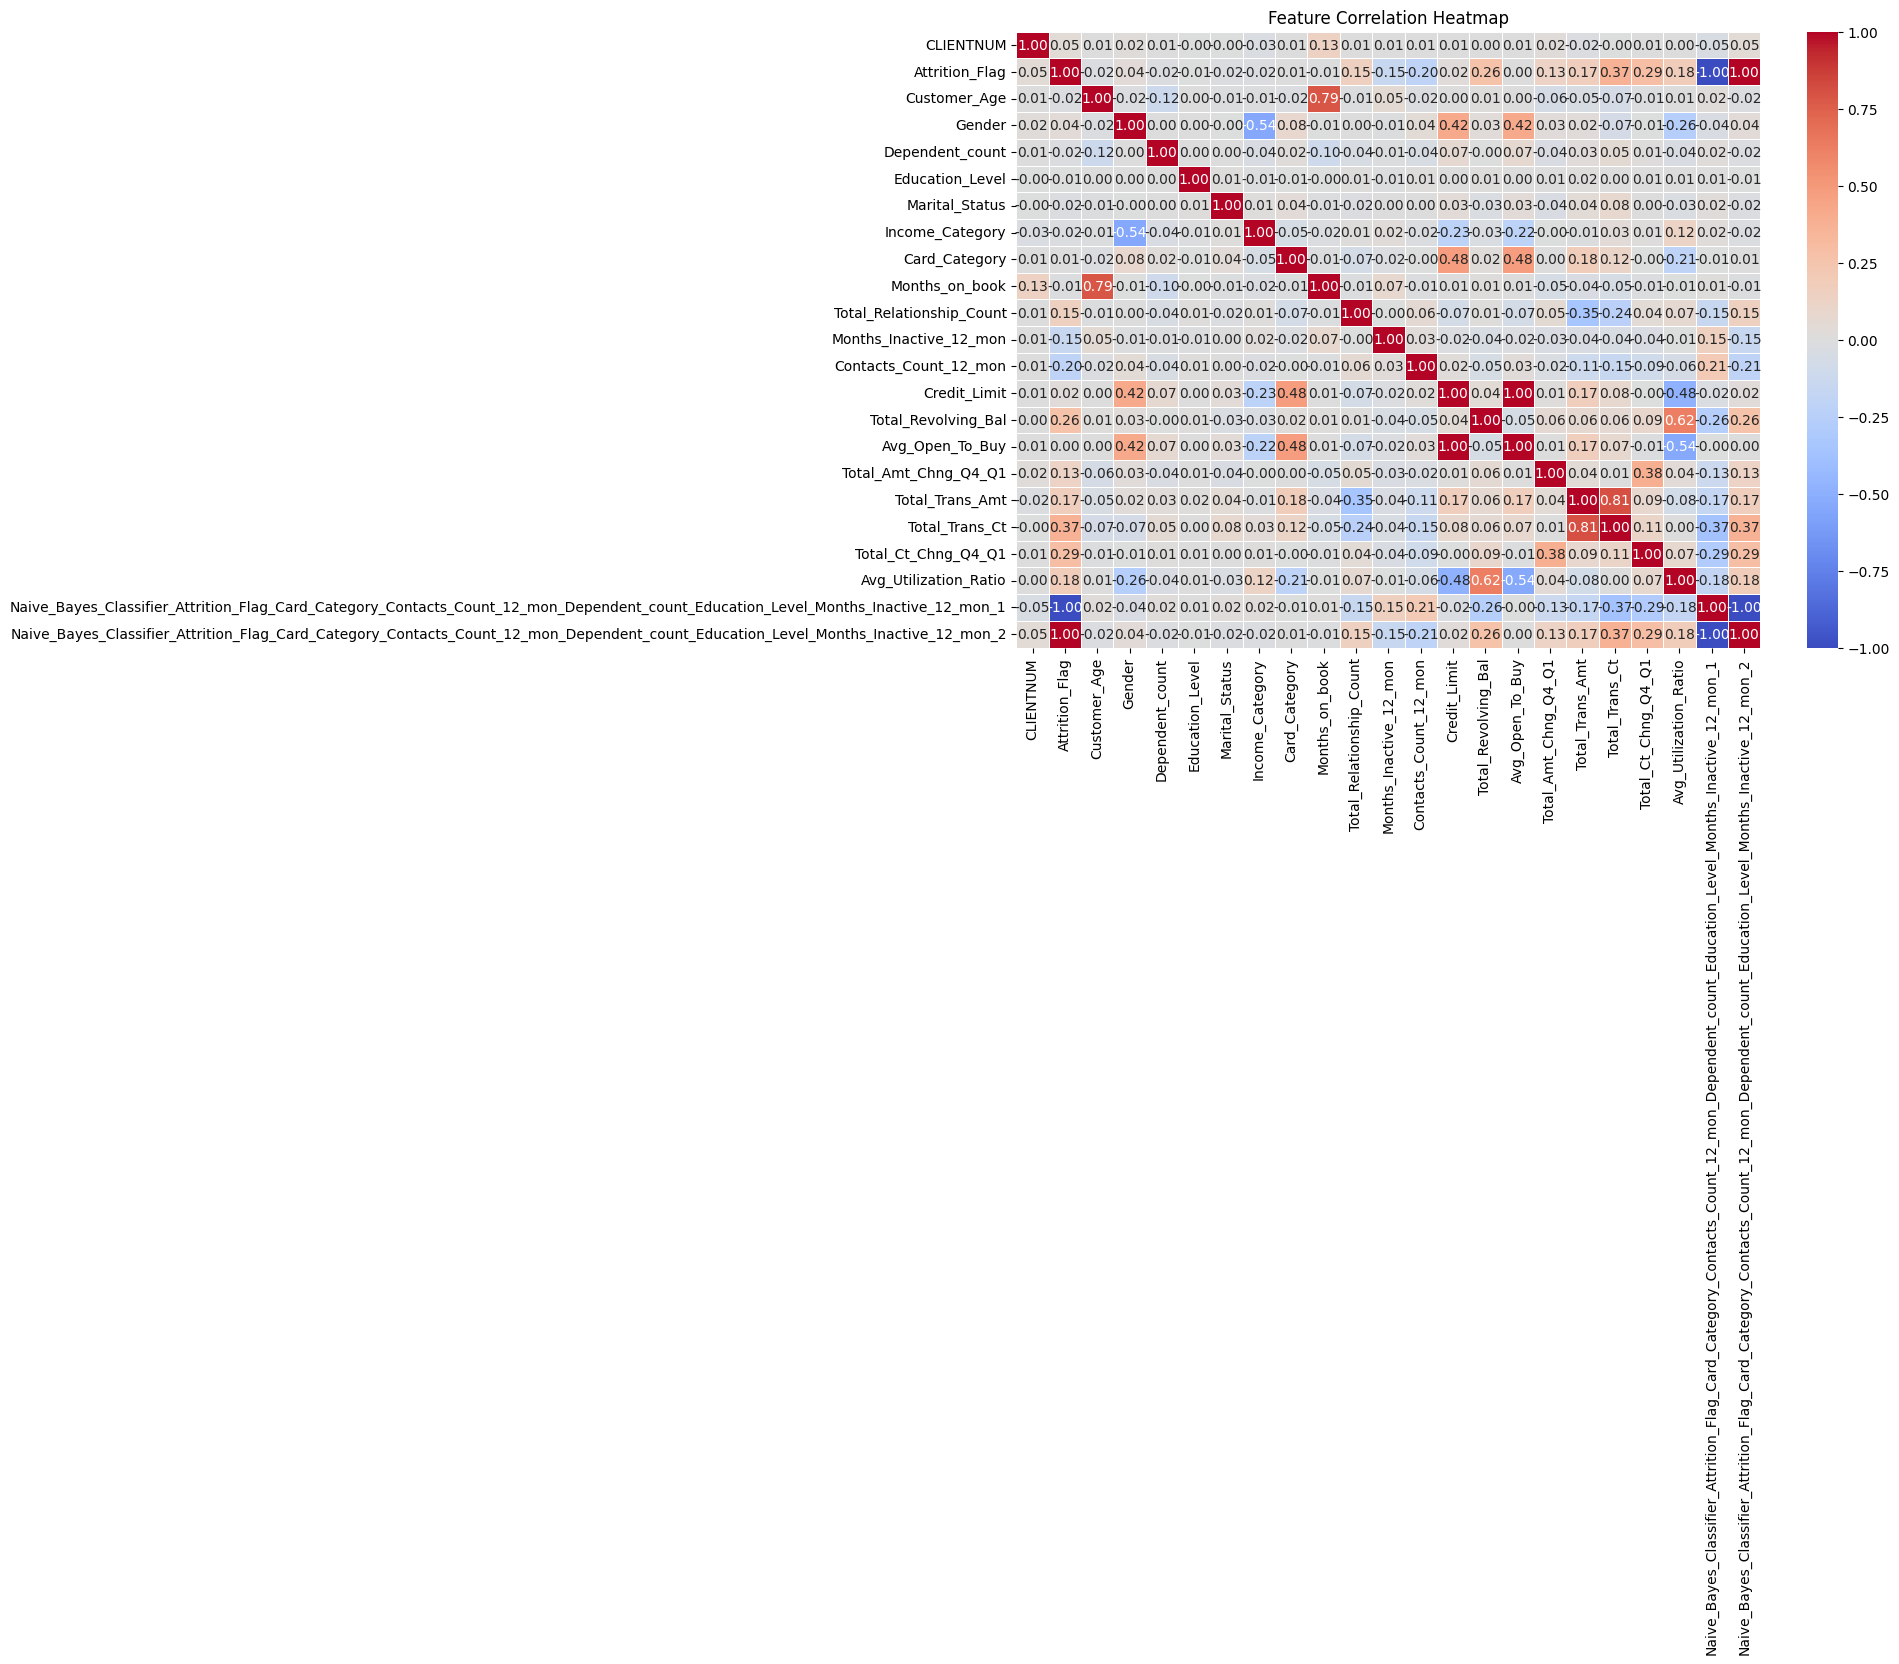

In [66]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Adversarial Attack Detection (Anomaly Detection)

In [67]:
z_scores = np.abs(stats.zscore(X_resampled))
anomaly_threshold = 3
anomalies = (z_scores > anomaly_threshold).sum(axis=1) > 0
print("Potential Adversarial Samples Detected:", sum(anomalies))

Potential Adversarial Samples Detected: 2264


# Model Explainability with LIME

In [74]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", feature_names=X_train.columns, class_names=["Bad", "Good"], discretize_continuous=True)
idx = np.random.randint(0, X_test.shape[0])
lime_exp = lime_explainer.explain_instance(X_test.iloc[idx].values, rf_model.predict_proba)
lime_exp.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Generate Fairness Report

In [69]:
X_train.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
grouped_results = df.groupby("FICO_Score")["Sex_M"].mean()
print("Fairness Report:")
print(grouped_results)

In [71]:
grouped_results = df.groupby("Credit_Score_Category")["Gender"].mean()
print("Fairness Report:")
print(grouped_results)

Fairness Report:
Credit_Score_Category
0    0.513451
1    0.239351
2    0.221902
3    0.227053
Name: Gender, dtype: float64


### **Risk Assessment & Defense Strategies in the Development Cycle**  
To build a robust **credit score prediction model**, various risk mitigation and explainability steps must be **strategically integrated** into the development lifecycle. Below is a **step-by-step breakdown** of when and how to incorporate these elements:

---

## **📌 1. Problem Definition & Risk Assessment (Planning Phase)**
**🔍 Key Actions:**  
✅ Define the problem scope (e.g., credit risk prediction).  
✅ Identify potential risks:
    - **Bias risks** (e.g., discrimination based on gender, income level).  
    - **Data quality risks** (missing values, inconsistent records).  
    - **Adversarial threats** (fraudulent manipulation of credit scores).  
✅ Establish fairness goals (e.g., ensuring equal credit opportunity).  

**🛡️ Mitigation Strategy:**  
- Use a **Bias & Fairness Assessment Framework** (e.g., Equalized Odds).  
- Define **security policies** to detect adversarial data manipulation.  

---

## **📌 2. Data Collection & Preprocessing (Data Engineering Phase)**
**🔍 Key Actions:**  
✅ Ensure high-quality, diverse, and unbiased training data.  
✅ Handle missing values, outliers, and class imbalance.  
✅ Perform **feature selection** to remove redundant or leaky features.  

**🛡️ Mitigation Strategy:**  
- **Bias Handling:** Apply **reweighting techniques** to ensure fair data distribution.  
- **Anomaly Detection:** Use **Isolation Forest / LOF** to detect fraudulent records.  
- **Feature Leakage Prevention:** Conduct a **correlation analysis** to remove data that might reveal future outcomes.  

---

## **📌 3. Model Development (Training & Optimization Phase)**
**🔍 Key Actions:**  
✅ Train multiple models (Random Forest, Logistic Regression, etc.).  
✅ Optimize hyperparameters using **GridSearchCV**.  
✅ Implement **bias-aware training** (e.g., class reweighting).  

**🛡️ Mitigation Strategy:**  
- **Handle Class Imbalance:** Use **SMOTE** to balance underrepresented labels.  
- **Fairness-Aware Training:** Implement **Adversarial Debiasing**.  
- **Prevent Overfitting:** Use **cross-validation (Stratified K-Folds)**.  

---

## **📌 4. Model Evaluation & Explainability (Testing Phase)**
**🔍 Key Actions:**  
✅ Use **Explainable AI (XAI)** methods to interpret model predictions.  
✅ Assess **feature importance** using **SHAP & LIME**.  
✅ Generate **fairness reports** to evaluate unintended biases.  

**🛡️ Mitigation Strategy:**  
- **Interpretability:** Use **SHAP summary & dependence plots** to explain decisions.  
- **Counterfactual Explanations:** Use LIME to check how small changes affect predictions.  
- **Fairness Testing:** Ensure **equalized odds** across different demographics.  

---

## **📌 5. Security Testing (Red Teaming & Adversarial Attacks)**
**🔍 Key Actions:**  
✅ Conduct **adversarial attack simulations** to assess model robustness.  
✅ Manipulate input features (e.g., inflate `Credit_Limit`, reduce `Utilization_Ratio`).  
✅ Evaluate whether the model is fooled by fraudulent input changes.  

**🛡️ Mitigation Strategy:**  
- **Anomaly Detection:** Use **Isolation Forest, LOF, and Elliptic Envelope** to detect manipulated inputs.  
- **Adversarial Training:** Train the model with **simulated attacks** to improve defenses.  
- **Model Robustness Testing:** Validate using **differential privacy & adversarial noise injection**.  

---

## **📌 6. Deployment & Continuous Monitoring (Post-Deployment Phase)**
**🔍 Key Actions:**  
✅ Deploy the model as an API or integrate it into the financial system.  
✅ Implement **real-time monitoring** for bias, fairness drift, and adversarial threats.  
✅ Continuously update the model with new data to prevent performance degradation.  

**🛡️ Mitigation Strategy:**  
- **Fairness Drift Detection:** Use **automated fairness audits** to detect emerging biases.  
- **Anomaly Flagging System:** Use **real-time fraud detection** to monitor inputs.  
- **Continuous Learning:** Retrain the model periodically using fresh data.  

---

## **📌 Summary: Development Cycle Integration**
| **Phase**                 | **Action**                                               | **Mitigation Strategies** |
|---------------------------|---------------------------------------------------------|---------------------------|
| **Planning**              | Identify risks (bias, fraud, adversarial attacks).      | Risk assessment, fairness audit. |
| **Data Engineering**      | Clean & preprocess data, remove bias.                   | SMOTE, anomaly detection, leakage prevention. |
| **Model Training**        | Train models, optimize hyperparameters.                 | Class balancing, fairness-aware training. |
| **Model Explainability**  | Use XAI (SHAP, LIME) to interpret predictions.          | SHAP analysis, fairness reports. |
| **Security Testing**      | Simulate adversarial attacks & fraud detection.         | Isolation Forest, adversarial training. |
| **Deployment & Monitoring** | Monitor for bias drift, adversarial activity.         | Fairness tracking, real-time anomaly detection. |

---
## **Next Steps**
Would you like me to **automate fairness drift monitoring** or **implement adversarial training** for better model robustness? 🚀

# Model Card: Credit Score Prediction Model

## Model Details
- **Model Type:** Random Forest Classifier
- **Objective:** Predict credit score as Good (1) or Bad (0)
- **Dataset:** BankChurners.csv
- **Features:** 38 features including customer demographics, account information, transaction details, and engineered features (PCA components)

## Performance Metrics
- **Accuracy:** [Insert Accuracy Score]
- **AUC-ROC:** [Insert AUC-ROC Score]
- **F1-Score:** [Insert F1-Score]

## Key Findings
- The model shows a clear separation between existing and attrited customers in the PCA space.
- The model effectively captures the variance in the data that distinguishes between Good and Bad credit scores.

## Limitations
- **Data Imbalance:** The dataset is highly imbalanced with more "Good" credit scores than "Bad" ones, which may lead to biased predictions.
- **Feature Leakage:** Some features may contain future information that is unavailable at the time of prediction, artificially inflating accuracy.
- **Overfitting:** The model may memorize patterns in training data rather than learning generalizable trends, leading to poor performance on unseen data.

## Biases
- **Demographic Bias:** Certain demographic groups (e.g., income level, gender, education) may be unfairly penalized by the model, leading to discriminatory predictions.
- **Class Imbalance:** The model might be biased towards predicting the majority class (Good credit score).

## Potential Attacks
- **Adversarial Attacks:** Attackers may manipulate input data (e.g., falsify income or credit utilization) to get favorable predictions.
- **Fraud Detection:** The model may be susceptible to fraudulent manipulation of credit scores.

## Mitigation Strategies
- **Data Imbalance:** Use SMOTE (Synthetic Minority Over-sampling Technique) to balance classes and class weighting in Random Forest to penalize misclassification of minority classes.
- **Bias & Fairness:** Implement adversarial debiasing or reweighting strategies to ensure fairness and use SHAP to check if features like "Gender" disproportionately influence predictions.
- **Overfitting:** Use cross-validation to validate performance across multiple subsets and limit tree depth and the number of trees to prevent overfitting.
- **Feature Leakage:** Perform feature importance analysis to detect and remove potential leaky features and use only features available at loan application time.
- **Adversarial Attacks:** Implement anomaly detection to flag suspicious inputs and use adversarial training to simulate and defend against attacks.

## Explainability
- **SHAP Values:** Used to explain which features impact predictions.
- **LIME:** Generate counterfactual explanations to check how small changes affect predictions.
- **Fairness Report:** Evaluate unintended biases and ensure equalized odds across different demographics.

## Next Steps
- **Automate Fairness Drift Monitoring:** Continuously monitor for bias and fairness drift.
- **Implement Adversarial Training:** Improve model robustness against adversarial attacks.
- **Real-time Monitoring:** Implement real-time monitoring for bias, fairness drift, and adversarial threats.

---
